In [171]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import math

In [172]:
data_dir = Path('pictures')
paths_to_imgs = list(data_dir.glob('*.bmp'))  # Search for files end with .lsm
paths_to_imgs.sort()
# Read in the first image in the folder
img = Image.open(paths_to_imgs[0])
px = img.load()
width, height = img.size
print(width, height)

640 480


In [173]:
def interpolate_pixels_along_line(x0, y0, x1, y1):
    """Uses Xiaolin Wu's line algorithm to interpolate all of the pixels along a
    straight line, given two points (x0, y0) and (x1, y1)

    Wikipedia article containing pseudo code that function was based off of:
        http://en.wikipedia.org/wiki/Xiaolin_Wu's_line_algorithm
    """
    pixels = []
    steep = abs(y1 - y0) > abs(x1 - x0)

    # Ensure that the path to be interpolated is shallow and from left to right
    if steep:
        t = x0
        x0 = y0
        y0 = t

        t = x1
        x1 = y1
        y1 = t

    if x0 > x1:
        t = x0
        x0 = x1
        x1 = t

        t = y0
        y0 = y1
        y1 = t

    dx = x1 - x0
    dy = y1 - y0
    gradient = dy / dx  # slope

    # Get the first given coordinate and add it to the return list
    x_end = round(x0)
    y_end = y0 + (gradient * (x_end - x0))
    xpxl0 = x_end
    ypxl0 = round(y_end)
    if steep:
        pixels.extend([(ypxl0, xpxl0), (ypxl0 + 1, xpxl0)])
    else:
        pixels.extend([(xpxl0, ypxl0), (xpxl0, ypxl0 + 1)])

    interpolated_y = y_end + gradient

    # Get the second given coordinate to give the main loop a range
    x_end = round(x1)
    y_end = y1 + (gradient * (x_end - x1))
    xpxl1 = x_end
    ypxl1 = round(y_end)

    # Loop between the first x coordinate and the second x coordinate, interpolating the y coordinates
    for x in range(xpxl0 + 1, xpxl1):
        if steep:
            pixels.extend([(math.floor(interpolated_y), x), (math.floor(interpolated_y) + 1, x)])

        else:
            pixels.extend([(x, math.floor(interpolated_y)), (x, math.floor(interpolated_y) + 1)])

        interpolated_y += gradient

    # Add the second given coordinate to the given list
    if steep:
        pixels.extend([(ypxl1, xpxl1), (ypxl1 + 1, xpxl1)])
    else:
        pixels.extend([(xpxl1, ypxl1), (xpxl1, ypxl1 + 1)])

    return pixels[0:-1]
def rgb_to_intensity(r, g, b):
    return (0.21 * r) + (0.72 * g) + (0.07 * b)

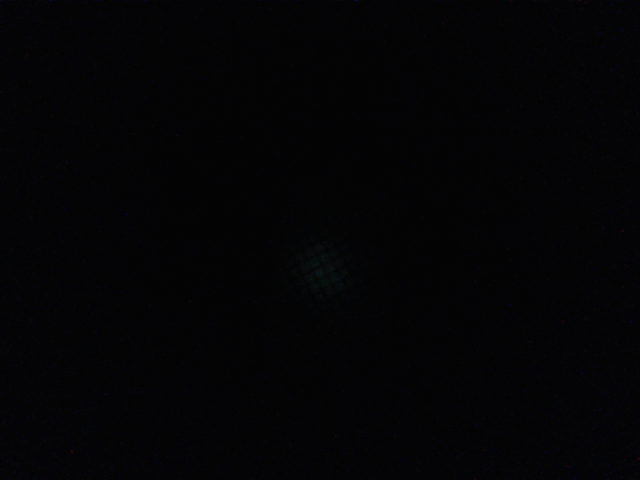

In [174]:
img

In [175]:
integral = 0
f = []
for (x, y) in interpolate_pixels_along_line(270,230,380,340):
    integral += rgb_to_intensity(*px[x, y])
    f.append(rgb_to_intensity(*px[x, y]))
    img.putpixel( (x, y), (255, 0, 0) )

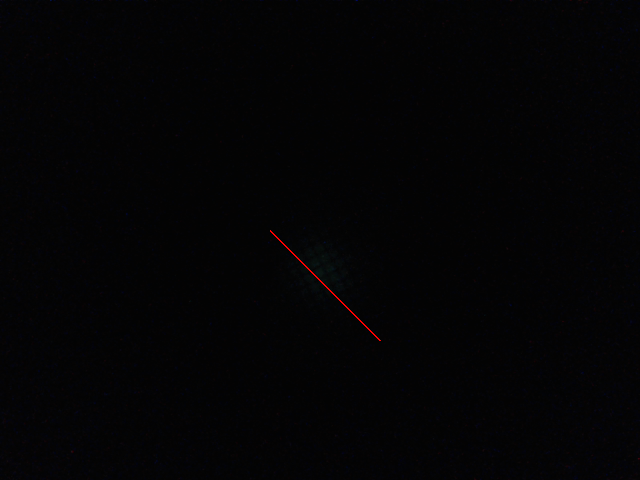

In [176]:
img

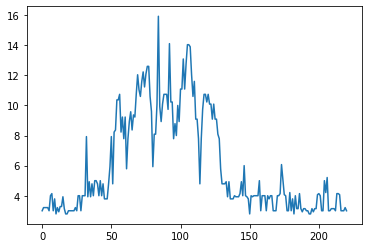

In [177]:
integral
plt.plot(f)

In [178]:
integrals = [0 for x in paths_to_imgs]
fs = [[] for x in paths_to_imgs]
i = 0
integral_line = interpolate_pixels_along_line(280,240,380,340)
for path in paths_to_imgs:
    img = Image.open(path)
    px = img.load()
    for (x, y) in interpolate_pixels_along_line(280,240,380,340):
        integrals[i] += rgb_to_intensity(*px[x, y])
        fs[i].append(rgb_to_intensity(*px[x, y]))
        img.putpixel( (x, y), (255, 0, 0) )
    i += 1

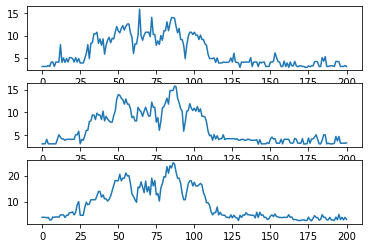

In [179]:
plt.figure()

plt.subplot(311)
plt.plot(fs[0])

plt.subplot(312)
plt.plot(fs[1])

plt.subplot(313)
plt.plot(fs[2])

plt.show()